In [1]:
path_coordinates_cache = "coordinates_cache_post2000.csv"
path_buildings = "../../Algandmed/Ehitised/Elamud_post2000.csv"

In [2]:
import pandas as pd
from geocoding import google_geocoding as geo

In [3]:
df = pd.read_csv(path_buildings)

c:\users\markl\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_loc = pd.DataFrame(index=df["Aadress tekstina kehtiv"].unique(), columns=['lng','lat','API_rejected'])
try:
    loaded = pd.read_csv(path_coordinates_cache, index_col=0)
except OSError:
    pass
else:
    merged = df_loc.merge(loaded, how='outer', left_index=True, right_index=True, suffixes=('', '_loaded'))
    df_loc.lng = merged.lng_loaded
    df_loc.lat = merged.lat_loaded
    df_loc.API_rejected = merged.API_rejected_loaded

In [5]:
missing_data = df_loc[df_loc[["lng","lat"]].isnull().any(axis=1)]

In [6]:
print("Number of missing values: ", len(missing_data.index))

Number of missing values:  920


In [9]:
#Only try to load for 20 
missing_data = missing_data.head(2000)


for loc_name in missing_data.index:
    #if missing_data["API_rejected"][loc_name]==True: continue;
    try:
        location = geo.get_location(loc_name)
    except LookupError as e:
        print(e)
        df_loc.set_value(loc_name, "API_rejected", True)
        continue;
    print(loc_name, end="\t")
    print(location)
    df_loc.set_value(loc_name, "lng", location["lng"])
    df_loc.set_value(loc_name, "lat", location["lat"])
    df_loc.set_value(loc_name, "API_rejected", False)
# Saving the coordinates to file, so we would not need to query the API again next time.
df_loc.to_csv(path_coordinates_cache, encoding='utf-8')

Could not find coordinates for Harju maakond, Kose vald, Kose-Uuemõisa alevik, Metsa tn 32
Could not find coordinates for Saare maakond, Lääne-Saare vald, Aste alevik, Aste AÜ 50
Could not find coordinates for Harju maakond, Saue vald, Koidu küla, Koidu tee 15
Could not find coordinates for Harju maakond, Saue vald, Koidu küla, Äärekoidu tee 9
Could not find coordinates for Harju maakond, Saue vald, Koidu küla, Koidu põik 3
Could not find coordinates for Saare maakond, Lääne-Saare vald, Mändjala küla, Malle tee 38
Could not find coordinates for Saare maakond, Lääne-Saare vald, Keskvere küla, Leeri-Peetri
Could not find coordinates for Harju maakond, Saue vald, Koidu küla, Koidu põik 1
Could not find coordinates for Saare maakond, Lääne-Saare vald, Parila küla, Suurlahe
Could not find coordinates for Harju maakond, Kose vald, Kose-Uuemõisa alevik, Karsti tn 2
Could not find coordinates for Saare maakond, Lääne-Saare vald, Vaivere küla, Pihlase
Could not find coordinates for Saare maakon

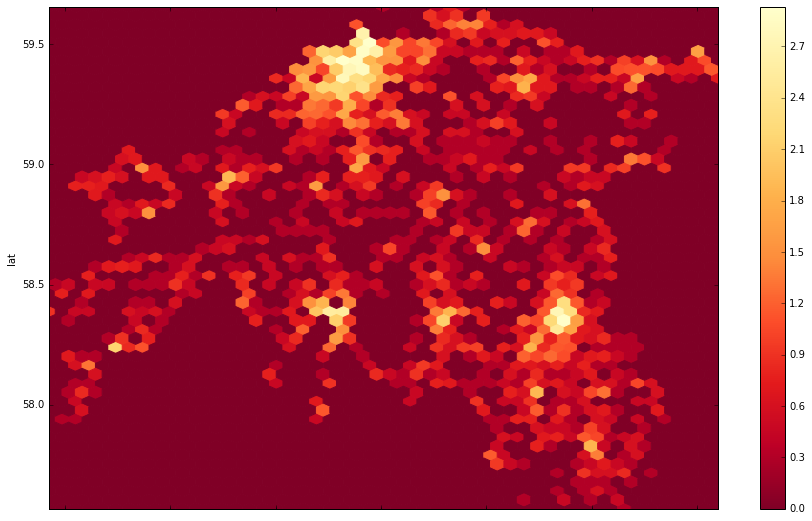

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#Distribution of events around estonia
df_loc.plot(kind='hexbin', x='lng', y='lat', gridsize=50, bins='log',  figsize=(15, 9), cmap=plt.cm.YlOrRd_r);